# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data\\emp_automovel.csv')

In [4]:
df.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [5]:
X = df.drop('inadimplente', axis=1)
y = df['inadimplente']

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
modelo = DecisionTreeClassifier()
modelo.fit(X, y)
modelo.score(X, y)

1.0

In [8]:
print(f'Acurácia: {modelo.score(X,y)}')

Acurácia: 1.0


### Validando o modelo

Avaliar os modelo com base nos mesmos dados usados no treinamento não é interessante. É preciso que a avaliação seja feita em dados independentes.

Avaliar o modelo nos próprios dados de treinamento seria o análogo a entregar uma prova com as questões e o gabarito para uma pessoa e no momento de avaliá-la novamente, entregar uma prova com as mesmas questões e alternativas. É esperado que essa pessoa se sairá bem por já ter visto as respostas e ter decorado o resultado. Isso é diferente de ter aprendido a matéria a partir daquela prova e depois fazer uma prova com conteúdo parecido e ter um resultado positivo.

No intuito de checar a generalização de um modelo, devemos separar o conjunto de dados em 3 partes: dados de treinamento, validação e teste.

- o conjunto de treinamento é utilizado para treinar os modelos. Os modelos vão entender o padrão dos dados a partir desse conjunto de dados.

- o conjunto de validação é utilizado para avaliar o desempenho de diferentes modelos, com dados novos que não foram usados no treinamento do modelo.

- o conjunto de teste fica separado dos demais desde o momento inicial para simular os dados do mundo real. Ele não é utilizado em nenhum momento no treinamento e nem na validação, servindo como uma estimativa da capacidade do modelo escolhido de generalizar e prever novos dados.

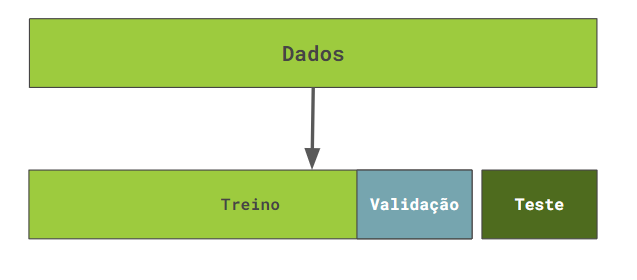

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=5)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=5)

In [11]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)
print(f'Acurácia de treino: {modelo.score(X_train, y_train)}')
print(f'Acurácia de validacao: {modelo.score(X_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validacao: 0.8468774496995035


In [12]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_train, y_train)
print(f'Acurácia de treino: {modelo.score(X_train, y_train)}')
print(f'Acurácia de validacao: {modelo.score(X_val, y_val)}')

Acurácia de treino: 0.9205865272938444
Acurácia de validacao: 0.9060186394913335


### Modelo com Random Forest

In [12]:
'''from sklearn.ensemble import RandomForestClassifier
'''

'from sklearn.ensemble import RandomForestClassifier\n'

### Avaliando o modelo

In [13]:
'''modelo = RandomForestClassifier(max_depth=10)
modelo.fit(X_train, y_train)
print(f'Acurácia de treino: {modelo.score(X_train, y_train)}')
print(f'Acurácia de validacao: {modelo.score(X_val, y_val)}')
'''

"modelo = RandomForestClassifier(max_depth=10)\nmodelo.fit(X_train, y_train)\nprint(f'Acurácia de treino: {modelo.score(X_train, y_train)}')\nprint(f'Acurácia de validacao: {modelo.score(X_val, y_val)}')\n"

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
y_previsto = modelo.predict(X_val)
matrix_confusao = confusion_matrix(y_val, y_previsto)
print(matrix_confusao)

[[10362   117]
 [  962    40]]


In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

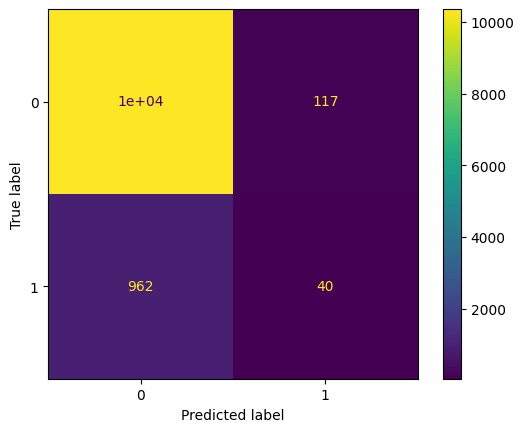

In [16]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matrix_confusao)
visualizacao.plot();

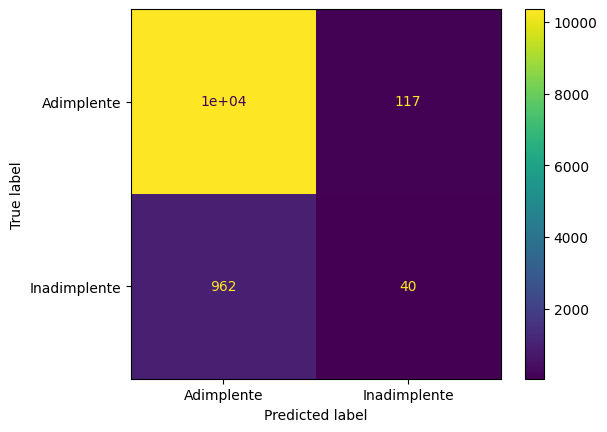

In [17]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matrix_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

## <font color='dark'>Métricas de avaliação</h1>

### Acurácia, precisão e recall

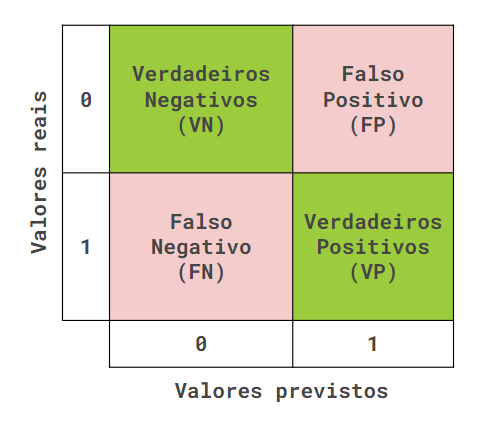

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9060186394913335


In [20]:
from sklearn.metrics import precision_score, recall_score

In [21]:
print(f'Precisao: {precision_score(y_val, y_previsto)}')
print(f'Recal: {recall_score(y_val, y_previsto)}')

Precisao: 0.25477707006369427
Recal: 0.03992015968063872


In [22]:
from sklearn.metrics import f1_score

In [23]:
print(f'F1_score: {f1_score(y_val, y_previsto)}')

F1_score: 0.06902502157031924


### Curva ROC

In [24]:
from sklearn.metrics import RocCurveDisplay

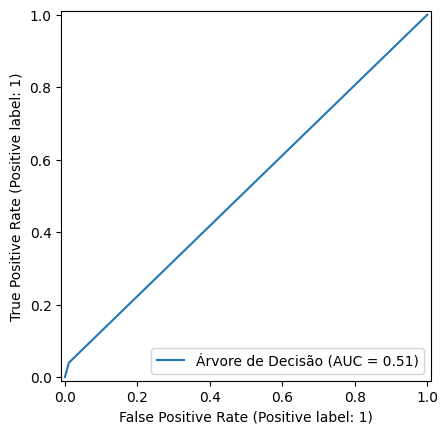

In [25]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name='Árvore de Decisão')

In [26]:
from sklearn.metrics import roc_auc_score

In [27]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5143774860813728


### Curva de precisão x recall

In [28]:
from sklearn.metrics import PrecisionRecallDisplay

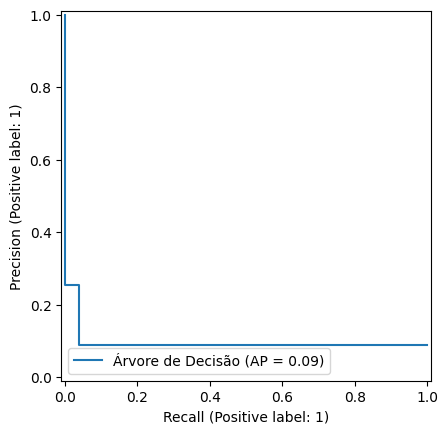

In [29]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name='Árvore de Decisão')

In [30]:
from sklearn.metrics import average_precision_score

In [31]:
print(f'AC: {average_precision_score(y_val, y_previsto)}')

AC: 0.09396135189389977


### Relatório de métricas

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



## <font color='dark'>Validação cruzada</h1>

### Usando o KFold

A validação do modelo de classificação a partir da separação dos dados em conjunto de treino e validação faz com que o resultado seja muito dependente dessa divisão dos dados e pode ser que, de forma aleatória, o padrão dos dados de validação sejam diferentes do padrão dos dados de treinamento, levando a sorte de ter um resultado muito melhor do que a realidade ou o azar de um resultado muito pior do que a realidade.

Levando isso em consideração, é possível utilizar a **validação cruzada**, uma estratégia mais consistente e bem mais utilizada nos projetos de machine learning.

Na validação cruzada, ao invés de separarmos os dados em apenas treino e validação uma única vez, dividimos os dados em várias partes de mesmo tamanho. Em cada uma dessas divisões, será utilizada uma parte para validação e todas as outras para treinamento e o processo se repete até que todas as partes sejam utilizadas para validação e o restante para treinamento.

Será gerado um modelo para cada uma dessas divisões e a avaliação de desempenho será feita tirando a média da métrica de cada modelo. Isso faz com que a dependência da separação dos dados seja eliminada, já que há uma variação maior da escolha dos dados e é retirada uma média.

Geralmente são utilizadas 5 ou 10 partes, mais do que isso não é tão necessário porque necessita de um processamento maior e valores menores já mitiga o problema da escolha dos dados.

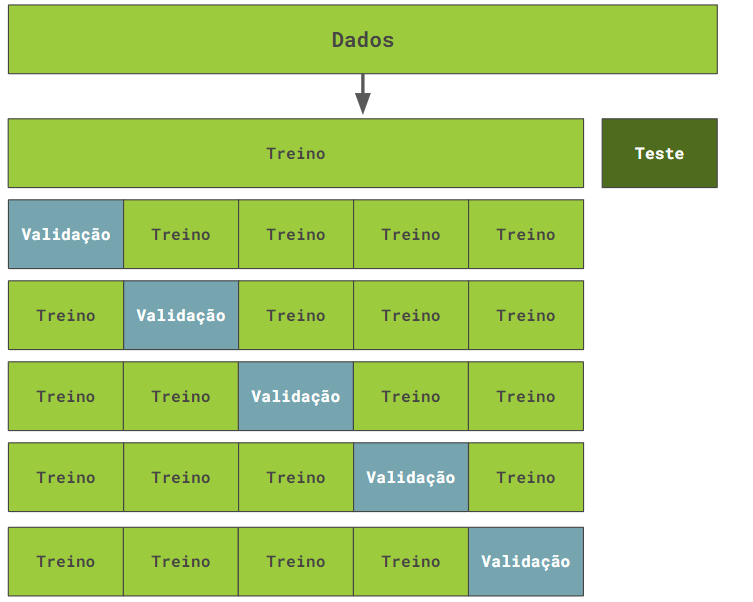

In [34]:
from sklearn.model_selection import cross_validate, KFold

In [35]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf)
cv_resultados

{'fit_time': array([0.13367176, 0.13016796, 0.13314104, 0.1305666 , 0.13325691]),
 'score_time': array([0.00216937, 0.00177431, 0.00212741, 0.00225902, 0.0022018 ]),
 'test_score': array([0.91366358, 0.90799216, 0.90755662, 0.91343641, 0.89939024])}

In [37]:
'''modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring=['accuracy', 'recall', 'precision', 'f1'])
cv_resultados'''

"modelo = DecisionTreeClassifier(max_depth=10)\nkf = KFold(n_splits=5, shuffle=True, random_state=5)\ncv_resultados = cross_validate(modelo, X, y, cv=kf, scoring=['accuracy', 'recall', 'precision', 'f1'])\ncv_resultados"

In [36]:
cv_resultados['test_score']

array([0.91366358, 0.90799216, 0.90755662, 0.91343641, 0.89939024])

In [37]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de Confianca: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de Confianca: [0.8980107364012917, 0.918804870585558]


### Validação cruzada com recall

In [38]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de Confianca: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [41]:
'''def relatorio_metrica(resultado):
    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        media = resultado[metrica].mean()
        desvio_padrao = resultado[metrica].std()
        print(f'Intervalo de confiança({metrica}): [{media-2*desvio_padrao}, {min(media+2*desvio_padrao, 1.0)}]')'''

"def relatorio_metrica(resultado):\n    for metrica in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:\n        media = resultado[metrica].mean()\n        desvio_padrao = resultado[metrica].std()\n        print(f'Intervalo de confiança({metrica}): [{media-2*desvio_padrao}, {min(media+2*desvio_padrao, 1.0)}]')"

In [39]:
modelo = DecisionTreeClassifier(max_depth=10)
kf = KFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=kf, scoring='recall')
cv_resultados

{'fit_time': array([0.13626647, 0.13350844, 0.13251185, 0.1294868 , 0.13381934]),
 'score_time': array([0.00403857, 0.00328827, 0.00304747, 0.00359893, 0.00336599]),
 'test_score': array([0.02774108, 0.02351485, 0.02091021, 0.01697128, 0.02312139])}

In [40]:
intervalo_conf(cv_resultados)

Intervalo de Confianca: [0.01541087854466063, 0.029492645642177108]


In [41]:
'''relatorio_metrica(cv_resultados)'''

'relatorio_metrica(cv_resultados)'

### Estratificando os dados

In [42]:
df['inadimplente'].value_counts(normalize=True)

inadimplente
0    0.912707
1    0.087293
Name: proportion, dtype: float64

In [43]:
from sklearn.model_selection import StratifiedKFold

In [44]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X, y, cv=skf, scoring='recall')

In [45]:
intervalo_conf(cv_resultados)

Intervalo de Confianca: [0.020448403483293295, 0.035424398905242224]


## <font color='dark'>Balanceamento de dados</h1>

### Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
# scikit-learn==1.5.2
# imbalanced-learn==0.12.3


In [47]:
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X, y)

In [48]:
y_balanced.value_counts(normalize=True)

inadimplente
0    0.5
1    0.5
Name: proportion, dtype: float64

In [50]:
modelo = DecisionTreeClassifier(max_depth=10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(modelo, X_balanced, y_balanced, cv=skf, scoring='recall')

In [51]:
intervalo_conf(cv_resultados)

Intervalo de Confianca: [0.7047850189864546, 0.7645793901800098]


### Pipeline para validação

In [52]:
from imblearn.pipeline import Pipeline as imbpipeline

In [53]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()), ('tree', modelo)])

In [54]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [55]:
intervalo_conf(cv_resultados)

Intervalo de Confianca: [0.2274355651507313, 0.2694464495378905]


Undersampling

In [56]:
from imblearn.under_sampling import NearMiss

In [57]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('tree', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [58]:
intervalo_conf(cv_resultados)

Intervalo de Confianca: [0.6249222037723646, 0.6970880016753146]


### Testando o modelo

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



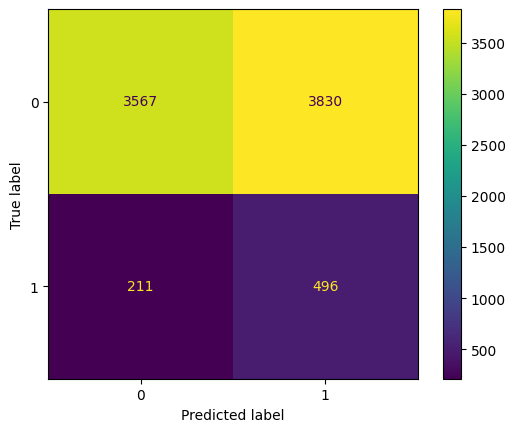

In [59]:
undersample = NearMiss(version=3)
X_balanced, y_balanced = undersample.fit_resample(X, y)

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(X_balanced, y_balanced)

y_previsto = modelo.predict(X_test)

print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);

In [60]:
from imblearn.combine import SMOTEENN

In [61]:
modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('SMOTEENN', SMOTEENN()), ('tree', modelo)])

In [62]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_resultados = cross_validate(pipeline, X, y, cv=skf, scoring='recall')

In [63]:
intervalo_conf(cv_resultados)

Intervalo de Confianca: [0.28108135731829104, 0.4034028130298711]
